In [5]:
using Formatting
using Images, FileIO

In [2]:
function padSize(kernelSize)
  row, col = kernelSize
  round(Int32, row/2, RoundDown),round(Int32, col/2, RoundDown)
end

function conv(in, kernel)

  row, col = size(in)
  krow, kcol = size(kernel)
  rowPad, colPad = padSize(size(kernel))

  feature_maps = zeros(eltype(in), (row + rowPad * 2, col + colPad * 2))
  out = zeros(eltype(in), size(in))

  colStartIdx = colPad + 1
  colEndIdx = colPad + col
  rowStartIdx = rowPad + 1
  rowEndIdx = rowPad + row

  # setup feature map and kernel
  feature_maps[rowStartIdx:rowEndIdx, colStartIdx:colEndIdx] = in
  kernel = rot180(kernel)

  for i in rowStartIdx:rowEndIdx
    for j in colStartIdx:colEndIdx
      part = feature_maps[i-rowPad:i-rowPad+krow-1, j-colPad:j-colPad+kcol-1]
      v = sum(part .* kernel)
      if (v < 0)
        v = 0
      elseif (v > 1)
        v = 1
      end
      out[i-rowPad,j-colPad] = v
    end
  end
  # TODO: normalize output
  out ./ maximum(out)
end

conv (generic function with 1 method)

In [8]:
in = [1 2 3; 4 5 6; 7 8 9]
kernel = [-1 -2 -1; 0 0 0; 1 2 1]
display(in)
display(kernel)
display(conv(in, kernel))

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

3×3 Array{Int64,2}:
 -1  -2  -1
  0   0   0
  1   2   1

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 1.0  1.0  1.0

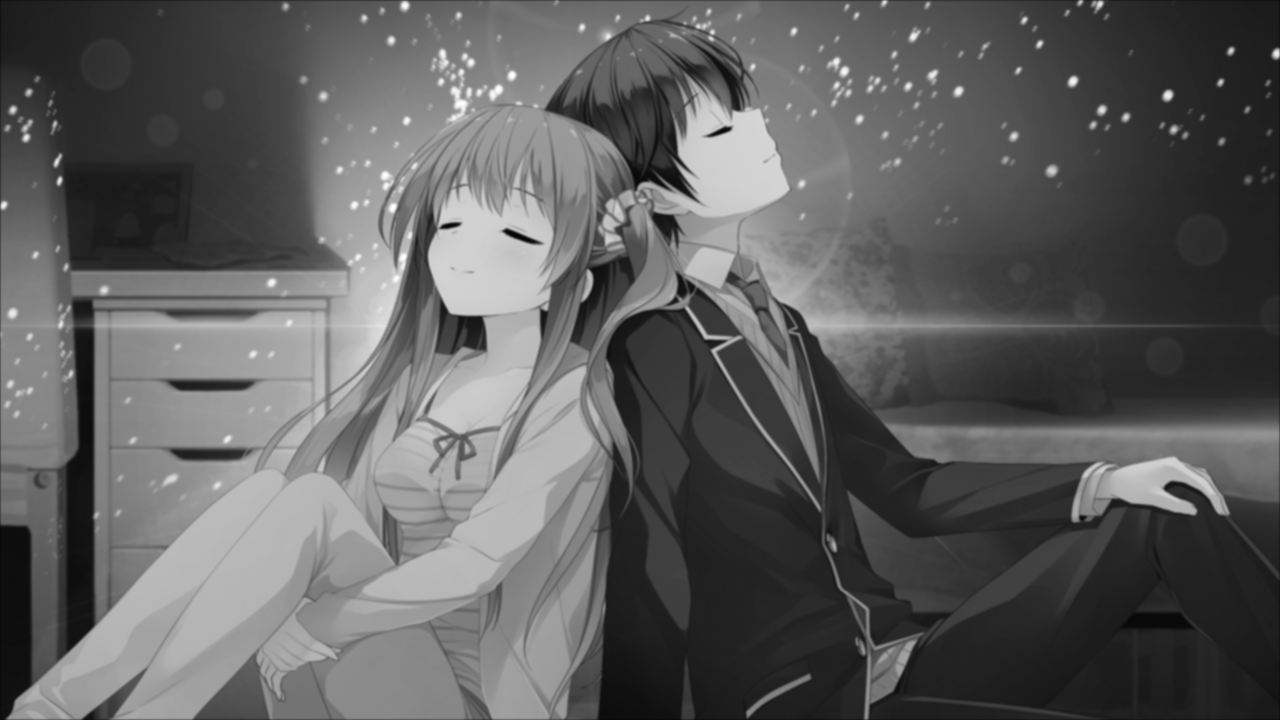

In [7]:
gaussian_kernel = [
  1 4 7 4 1
  4 16 26 16 4
  7 26 41 26 7
  4 16 26 16 4
  1 4 7 4 1
] ./ 273
img = load("../images/f124074.jpg")
img_gray = Gray.(img)
img_blur = conv(img_gray, gaussian_kernel)
display(Gray.(img_blur))